In [82]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [84]:
os.chdir('C:\\Users\\mahes\\Downloads')

In [86]:
cust_df=pd.read_csv('customer_support_tickets.csv')

# Data Exploration

In [89]:
cust_df.head(2)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN


In [91]:
cust_df.dtypes

Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object

In [93]:
cust_df.nunique()

Ticket ID                       8469
Customer Name                   8028
Customer Email                  8320
Customer Age                      53
Customer Gender                    3
Product Purchased                 42
Date of Purchase                 730
Ticket Type                        5
Ticket Subject                    16
Ticket Description              8077
Ticket Status                      3
Resolution                      2769
Ticket Priority                    4
Ticket Channel                     4
First Response Time             5470
Time to Resolution              2728
Customer Satisfaction Rating       5
dtype: int64

In [95]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [97]:
cust_df['Ticket Description']

0       I'm having an issue with the {product_purchase...
1       I'm having an issue with the {product_purchase...
2       I'm facing a problem with my {product_purchase...
3       I'm having an issue with the {product_purchase...
4       I'm having an issue with the {product_purchase...
                              ...                        
8464    My {product_purchased} is making strange noise...
8465    I'm having an issue with the {product_purchase...
8466    I'm having an issue with the {product_purchase...
8467    I'm having an issue with the {product_purchase...
8468    There seems to be a hardware problem with my {...
Name: Ticket Description, Length: 8469, dtype: object

In [99]:
cust_df.duplicated().sum()

0

# Data Cleaning and Manuplation

In [102]:
cust_df['Clean Description']=cust_df['Ticket Description'].str.replace(r'\{.*?\(#}','',regex=True).str.lower()

In [104]:
#convert Date/Time column form object to datetime
cust_df['First Response Time']=pd.to_datetime(cust_df['First Response Time'],format='%Y-%m-%d %H:%M:%S')
cust_df['Time to Resolution']=pd.to_datetime(cust_df['Time to Resolution'],format='%Y-%m-%d %H:%M:%S')
cust_df['Date of Purchase']=pd.to_datetime(cust_df['Date of Purchase'],format='%Y-%m-%d')

cust_df.dtypes


Ticket ID                                int64
Customer Name                           object
Customer Email                          object
Customer Age                             int64
Customer Gender                         object
Product Purchased                       object
Date of Purchase                datetime64[ns]
Ticket Type                             object
Ticket Subject                          object
Ticket Description                      object
Ticket Status                           object
Resolution                              object
Ticket Priority                         object
Ticket Channel                          object
First Response Time             datetime64[ns]
Time to Resolution              datetime64[ns]
Customer Satisfaction Rating           float64
Clean Description                       object
dtype: object

In [106]:
# Creating New Column of Resolution Time
cust_df['Resolution_Time']=cust_df['Time to Resolution']-cust_df['First Response Time']
cust_df['Resolution_Time']=cust_df['Resolution_Time'].apply(lambda x: x if x >= pd.Timedelta(0) else pd.NaT)
cust_df['Resolution_Time'].nunique()

780

In [108]:
# What is the Average Resolution Time for different Types of Issues
Average_Resolution_Time=cust_df.groupby('Ticket Type').agg({'Resolution_Time':'mean'})
Average_Resolution_Time['Resolution Time Formatted'] = Average_Resolution_Time['Resolution_Time'].apply(
    lambda x: f"{int(x.total_seconds() // 3600):02}:{int((x.total_seconds() % 3600) // 60):02}:{int(x.total_seconds() % 60):02}" if pd.notnull(x) else None)
Average_Resolution_Time.drop('Resolution_Time',axis=1,inplace= True)
Average_Resolution_Time=Average_Resolution_Time.sort_values(by= 'Resolution Time Formatted', ascending= True)

In [110]:
# Reset Index To Make Ticke Type a Column
Average_Resolution_Time=Average_Resolution_Time.reset_index()

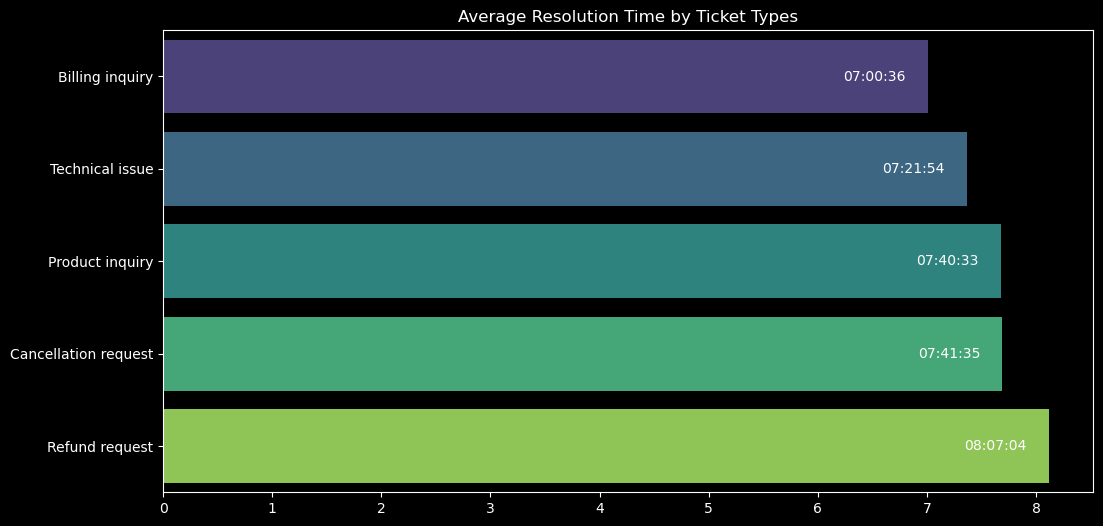

In [112]:
# Convert 'Resolution_Time_Formatted' into a numerical time in hour for plotting
def convert_to_hours(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h + m / 60 + s / 3600

Average_Resolution_Time['Resolution Time(hours)']=Average_Resolution_Time['Resolution Time Formatted'].apply(convert_to_hours)

plt.style.use('dark_background')
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Resolution Time(hours)', y='Ticket Type', data= Average_Resolution_Time, palette ="viridis" )
plt.title('Average Resolution Time by Ticket Types')
plt.xlabel('')
plt.ylabel('')

for index, row in Average_Resolution_Time.iterrows():
    plt.text(row['Resolution Time(hours)'] - 0.2, index, row['Resolution Time Formatted'], color='white', va="center", ha="right")

plt.show()

In [ ]:
#how does resolution time correlate with customer satisfaction rate

# Convert 'Resolution Time' to delta time then to total seconds
cust_df['Resolution_Time'] = pd.to_timedelta(cust_df['Resolution_Time'], errors='coerce')
converted_count = cust_df['Resolution_Time'].notna().sum()
total_count = len(cust_df)
print(f"Converted: {converted_count} out of {total_count}")
cust_df['Resolution Time in Seconds'] = cust_df['Resolution_Time'].apply(lambda x: x.total_seconds() if pd.notnull(x) else None)
cust_df['Customer Satisfaction Rating'] = pd.to_numeric(cust_df['Customer Satisfaction Rating'], errors='coerce')
filtered_df = cust_df.dropna(subset=['Resolution Time in Seconds', 'Customer Satisfaction Rating'])

correlation = filtered_df['Resolution Time in Seconds'].corr(filtered_df['Customer Satisfaction Rating'])
print(f"Correlation between resolution time and customer satisfaction: {correlation}")

### Upon examining the correlation between average resolution time and customer satisfaction rate, I found a correlation of -0.00354. While the negative sign suggests that an increase in resolution time might lead to a slight decrease in customer satisfaction—an intuitively logical relationship—the value is so close to zero that it indicates a nearly negligible effect. This suggests that average resolution time does not significantly influence customer satisfaction rates.

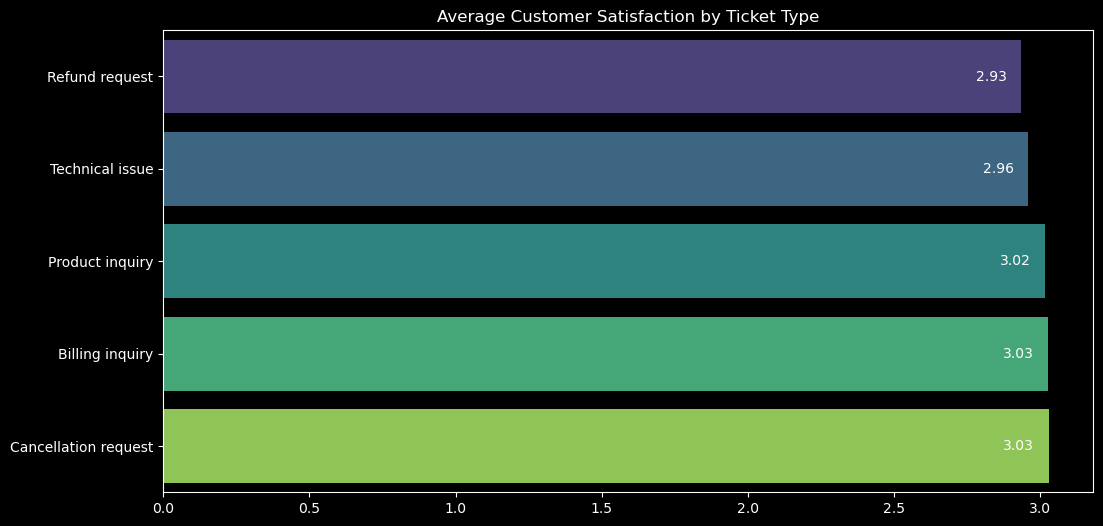

In [119]:
# What is the most type of issue leads to a customer dissatisfactions
result=cust_df.groupby('Ticket Type').agg({'Customer Satisfaction Rating':'mean'})
result_sorted=result.sort_values(by= 'Customer Satisfaction Rating', ascending= True)
result_sorted=result_sorted.reset_index()

plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.barplot(x= 'Customer Satisfaction Rating', y= 'Ticket Type', data= result_sorted, palette="viridis", dodge=False)
plt.title('Average Customer Satisfaction by Ticket Type')
plt.xlabel('')
plt.ylabel('')

for index, row in result_sorted.iterrows():
    plt.text(row['Customer Satisfaction Rating'] - 0.05, index, f"{row['Customer Satisfaction Rating']:.2f}", 
             color='white', va="center", ha="right")

plt.show()

### Refund requests have the lowest customer satisfaction ratings, so it's important to identify which specific subjects within refund requests contribute to these low ratings.

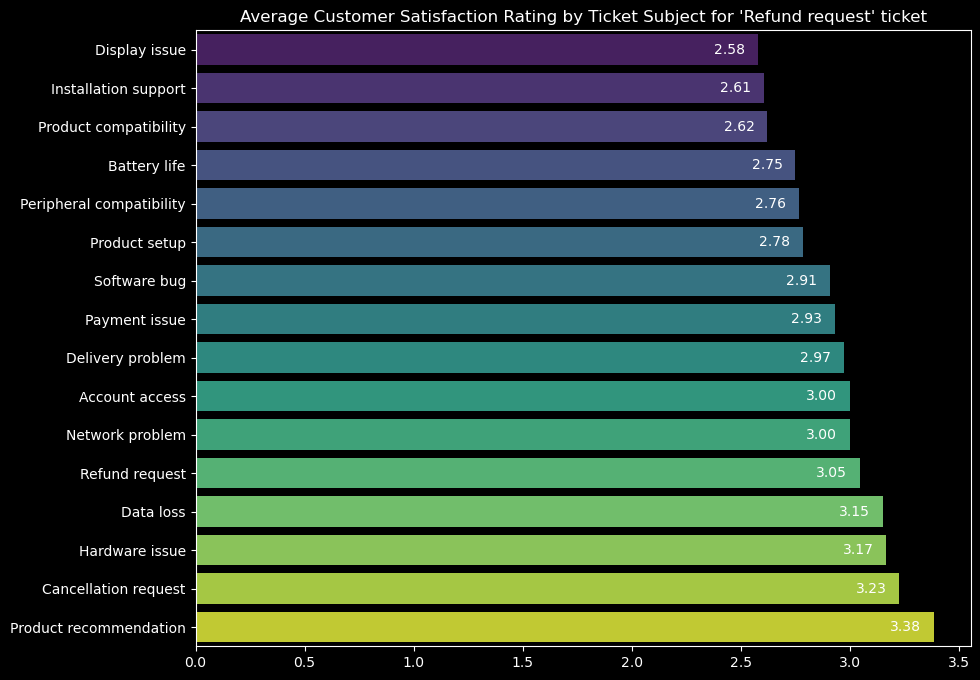

In [122]:
#Filter Data only include 'refund request' ticket type
Refund_request =cust_df[cust_df['Ticket Type'] == 'Refund request']
refund_subjects=Refund_request.groupby('Ticket Subject').agg({'Customer Satisfaction Rating':'mean'})
refund_subjects_sorted=refund_subjects.sort_values(by='Customer Satisfaction Rating', ascending= True)

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=refund_subjects_sorted['Customer Satisfaction Rating'], y=refund_subjects_sorted.index, palette='viridis')

for p in ax.patches:
    ax.text(p.get_width() -0.2 , p.get_y() + p.get_height() / 2,
            f'{p.get_width():.2f}', fontsize=10, color='white', ha='left', va='center')

plt.title("Average Customer Satisfaction Rating by Ticket Subject for 'Refund request' ticket", color='white')
plt.xlabel('', color='white')
plt.ylabel('', color='white')

plt.show()

### As shown, customer satisfaction ratings drop significantly for subjects related to display issues, installation support, and product compatibility.

## Key Insights:¶
#### 1. Average Resolution Time by Issue Type: Analysis indicates that average resolution times differ slightly by ticket type, with billing inquiries resolved in approximately 7 minutes and refund requests taking around 8 minutes. This small variation raises the question of whether resolution time impacts customer satisfaction.
#### 2. Correlation Between Resolution Time and Customer Satisfaction: The correlation analysis reveals a very weak, negative correlation (-0.00354) between resolution time and customer satisfaction. Although this result theoretically suggests that higher resolution times may decrease satisfaction, the correlation is so close to zero that resolution time likely has minimal impact on customer satisfaction.
#### 3. Issue Types Leading to Customer Dissatisfaction: Among the ticket types, refund requests consistently received the lowest customer satisfaction ratings. Within this category, specific subjects like display issues, installation support, and product compatibility particularly stand out as areas with notable dissatisfaction.


## Conclusion:

#### The analysis suggests that while resolution time varies by ticket type, it does not significantly affect customer satisfaction. Instead, dissatisfaction appears more closely tied to specific issues within refund requests, particularly display, installation, and compatibility problems. This insight highlights areas where improving service quality, particularly for refund-related issues, could have a stronger impact on enhancing overall customer satisfaction than focusing on reducing resolution times alone.